# Earth Observation Data Visualization

![](imgs/eodata.png)

# Sentinel-2

Sentinel-2 is a satellite mission developed by the European Space Agency (ESA) as part of the Copernicus program. It consists of a constellation of two identical satellites, Sentinel-2A and Sentinel-2B, launched in 2015 and 2017, respectively. The primary objective of the Sentinel-2 mission is to provide high-resolution optical imagery of the Earth’s land surfaces, vegetation, and coastal areas.

The Sentinel-2 satellites are equipped with a multispectral imager called the MultiSpectral Instrument (MSI), which captures images in 13 spectral bands. These bands cover a wide range of wavelengths, from the visible to the near-infrared and shortwave infrared regions, enabling detailed monitoring of various Earth processes and features.

The data captured by Sentinel-2 is used for a wide range of applications, including land cover mapping, agricultural monitoring, forestry management, disaster mapping, urban planning, and water quality assessment. With a revisit time of five days, the constellation provides regular and systematic coverage of the Earth’s land surfaces, allowing for the monitoring of changes over time.
Sentinel-2 data is freely available to the public and can be accessed through the Copernicus Open Access Hub. This open data policy has made Sentinel-2 a valuable resource for scientists, researchers, and decision-makers worldwide, enabling them to better understand and manage our planet’s resources and environment.

Overall, Sentinel-2 has become an essential tool in Earth observation, providing a wealth of information for various applications, supporting sustainable development, and contributing to global efforts in environmental monitoring and management.


![](https://scientiaplusconscientia.files.wordpress.com/2016/02/sentinel2_201601xx.png)

![](https://sentinels.copernicus.eu/documents/247904/4631569/S2_Revisit_Time_2022_HLOP_3.0.png)

# Download the dataset

In this study, we address the challenge of land use and land cover classification using Sentinel-2 satellite images. The Sentinel-2 satellite images are openly and freely accessible provided in the Earth observation program Copernicus. We present a novel dataset based on Sentinel-2 satellite images covering 13 spectral bands and consisting out of 10 classes with in total 27,000 labeled and geo-referenced images. We provide benchmarks for this novel dataset with its spectral bands using state-of-the-art deep Convolutional Neural Network (CNNs). With the proposed novel dataset, we achieved an overall classification accuracy of 98.57%. The resulting classification system opens a gate towards a number of Earth observation applications. We demonstrate how this classification system can be used for detecting land use and land cover changes and how it can assist in improving geographical maps.

Get more information [here](https://github.com/phelber/EuroSAT).

![](https://github.com/phelber/EuroSAT/blob/master/eurosat_overview_small.jpg?raw=true)

For this tutorial we are using the EuroSAT RGB dataset, accessible via wget. The following cell takes care of downloading, unzipping and preparing the dataset.

In [ ]:
!rm -r /content/EuroSAT.zip
!rm -r /content/EuroSAT
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate
!unzip -q /content/EuroSAT.zip
!mv 2750 EuroSAT
!ls -l /content/EuroSAT

## Cloning repository with base code
Basic functions are wrapped in seprated files to keep the notebook clean. Feel free to explore the code.

In [ ]:
import sys
!rm -r /content/QML-tutorial
!git clone https://github.com/alessandrosebastianelli/QML-tutorial.git
if '/content/QML-tutorial' not in sys.path: sys.path.append('/content/QML-tutorial')

# Visualize Data

In [2]:
from utils.DatasetHandler import DatasetHandler
import matplotlib.pyplot as plt

from config import *

Load the dataset

In [6]:
################################ and print classes          ################################
print('Loading Dataset')
DATASET_ROOT = 'EuroSAT'
dh = DatasetHandler(DATASET_ROOT)

classes = []
for i, c in enumerate(dh.classes):
    cl = c.split(os.path.sep)[-1]
    classes.append(cl)
classes.sort()
print('[*] Classes: {}'.format(classes))

################################ Load image paths and labels ################################
imgs, labels = dh.load_paths_labels(DATASET_ROOT, classes=classes)
print('[*] Size: {}'.format(len(imgs)))

Loading Dataset
[*] Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
[*] Size: 27000


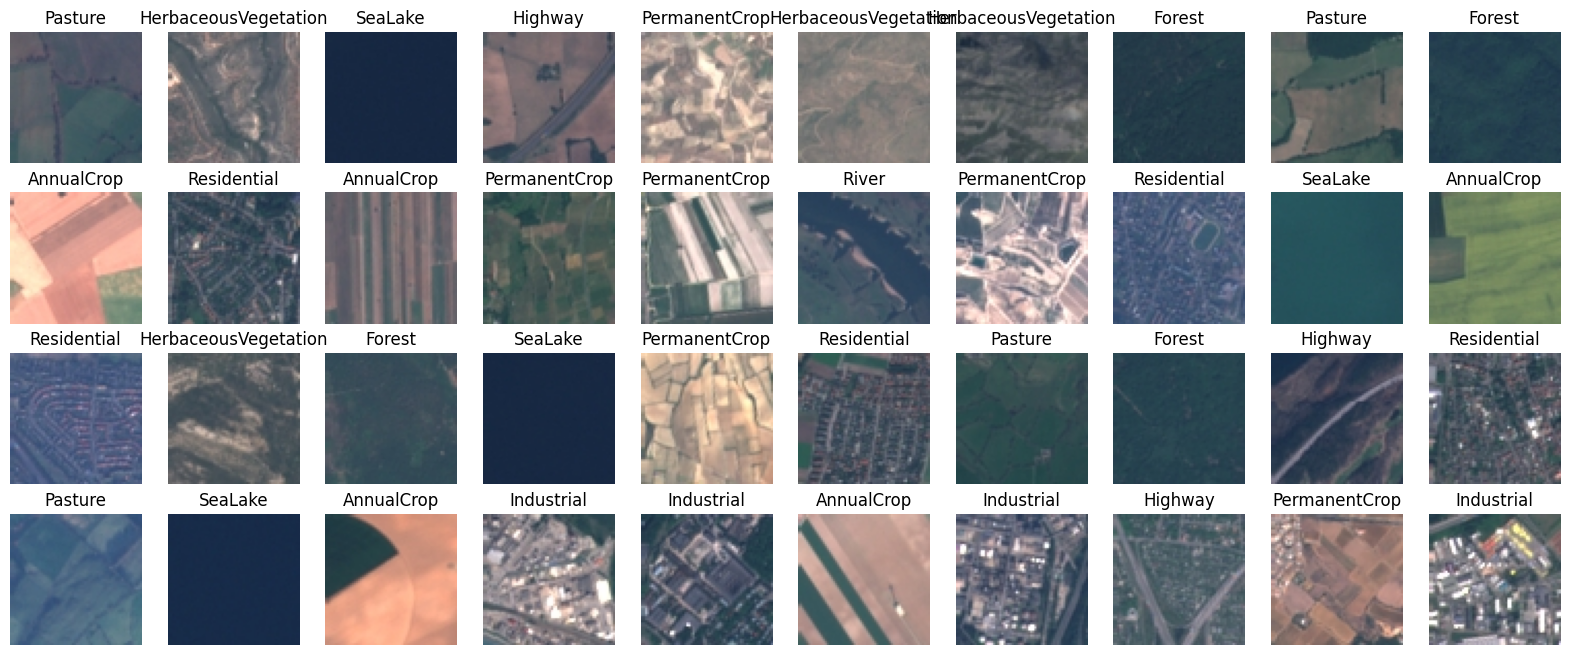

In [10]:
NROWS = 4
NCOLS = 10

fig, axes = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize = (NCOLS*2,NROWS*2))
axes = axes.flatten()

for i in range(NROWS*NCOLS):
    axes[i].imshow(plt.imread(imgs[i]))
    axes[i].axis(False)
    axes[i].set_title(classes[labels[i]])